In [2]:
%load_ext autoreload
%autoreload 2
#Add own modules to path
import sys
sys.path.append('../..')
sys.path.append('../../src/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.visualization.visualize import plot_confusion_matrix
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

data = load_breast_cancer()
X = data.data
z = data.target

X_train,X_test,z_train,z_test = train_test_split(X,z,test_size=0.2)
X_scl = StandardScaler().fit(X_train)
X_train = X_scl.transform(X_train)
X_test = X_scl.transform(X_test)

Train accuracy:  0.9868131868131869
Test accuracy:  0.9912280701754386


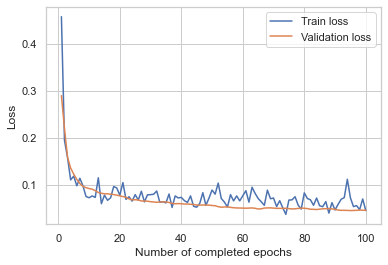

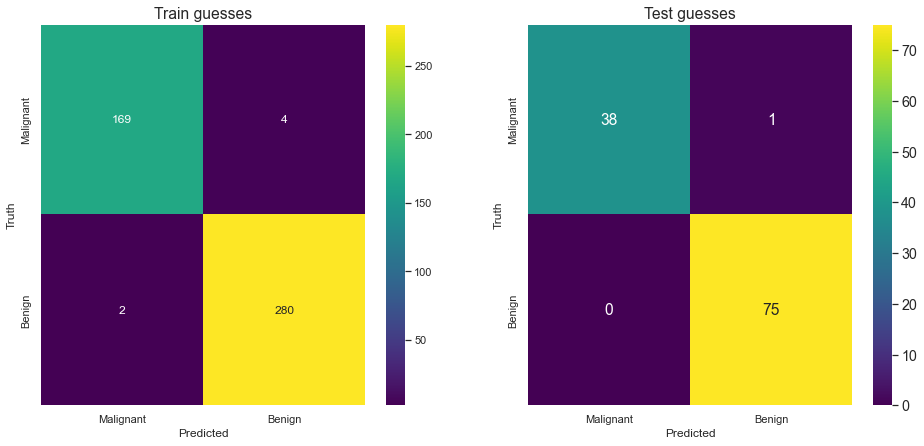

In [13]:
from src.modelling.logreg import SGD_logreg
sns.set_theme(style='whitegrid')
#Model parameters
lmb = 0.001
momentum = 0.9
schedule = 'constant'
lr0 = 0.01
batch_size=32
n_epochs=100

logreg = SGD_logreg(lmb = lmb,
                   momentum = momentum,
                   schedule = schedule,
                   lr0=lr0,
                   batch_size=batch_size,
                   n_epochs=n_epochs,
                   val_fraction=0.1)

logreg.fit(X_train,z_train)
logreg.plot_loss()


print("Train accuracy: ",logreg.score(X_train,z_train))
print("Test accuracy: ",logreg.score(X_test,z_test))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z_train,logreg.predict(X_train),ax=ax1,title = 'Train guesses')
ax2 = plot_confusion_matrix(z_test,logreg.predict(X_test),ax=ax2, title = 'Test guesses')

The logistic regressor is very quickly able to reach a good score, with only one mistake on the test set. Again note that crossvalidation should be employed for bench-marking.
### Higher epochs

Train accuracy:  0.989010989010989
Test accuracy:  0.9824561403508771


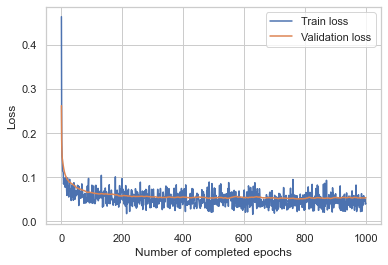

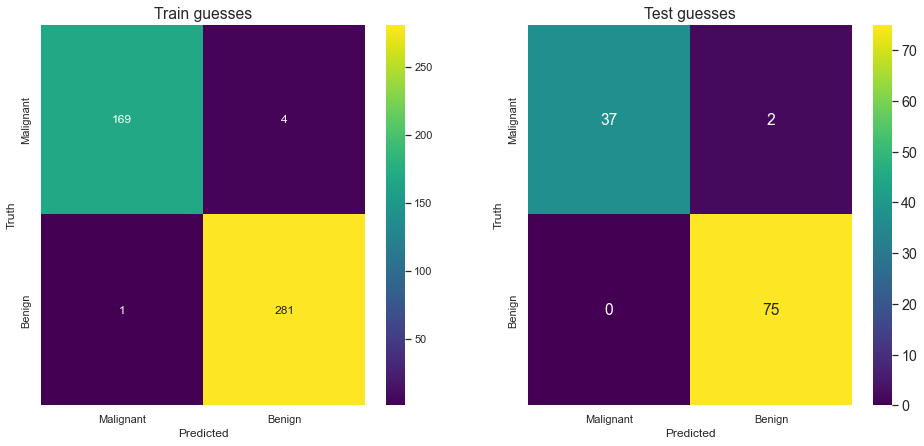

In [17]:
sns.set_theme(style='whitegrid')
#Model parameters
lmb = 0.001
momentum = 0.9
schedule = 'constant'
lr0 = 0.01
batch_size=32
n_epochs=1000

logreg = SGD_logreg(lmb = lmb,
                   momentum = momentum,
                   schedule = schedule,
                   lr0=lr0,
                   batch_size=batch_size,
                   n_epochs=n_epochs,
                   val_fraction=0.1)

logreg.fit(X_train,z_train)
logreg.plot_loss()


print("Train accuracy: ",logreg.score(X_train,z_train))
print("Test accuracy: ",logreg.score(X_test,z_test))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z_train,logreg.predict(X_train),ax=ax1,title = 'Train guesses')
ax2 = plot_confusion_matrix(z_test,logreg.predict(X_test),ax=ax2, title = 'Test guesses')

It can be seen that increasing number of epochs beyond 200-400 is somewhat redundant. n_epochs =200 is used going forward.
#### Gridsearching lambda vs learning rate

../..\src\modelling\linreg.py:309: RuntimeWarning: overflow encountered in matmul
  return X @ self.beta + self.intercept
../..\src\modelling\linreg.py:376: RuntimeWarning: overflow encountered in multiply
  self.v = self.momentum*self.v - self.lr*self.cost_grad(X,update)
../..\src\modelling\linreg.py:309: RuntimeWarning: invalid value encountered in matmul
  return X @ self.beta + self.intercept
../..\src\modelling\linreg.py:309: RuntimeWarning: overflow encountered in matmul
  return X @ self.beta + self.intercept
../..\src\modelling\linreg.py:376: RuntimeWarning: overflow encountered in multiply
  self.v = self.momentum*self.v - self.lr*self.cost_grad(X,update)
../..\src\modelling\linreg.py:309: RuntimeWarning: invalid value encountered in matmul
  return X @ self.beta + self.intercept
../..\src\modelling\linreg.py:309: RuntimeWarning: overflow encountered in matmul
  return X @ self.beta + self.intercept
../..\src\modelling\linreg.py:309: RuntimeWarning: invalid value encountered i

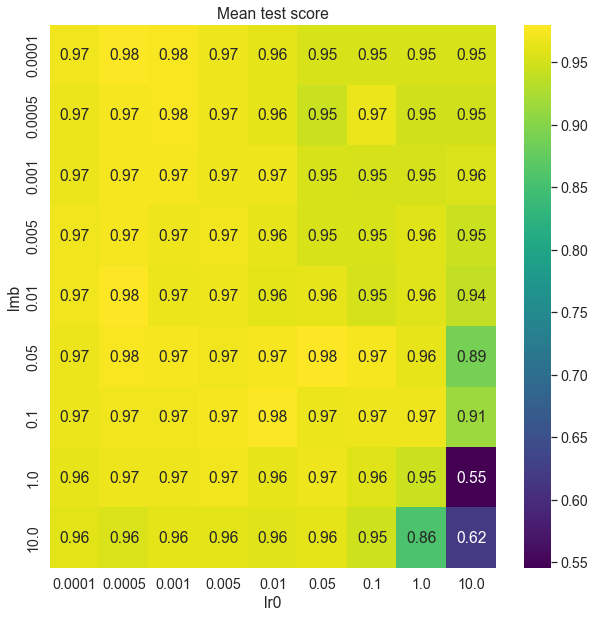

lmb                0.01000
lr0                0.00050
mean_test_score    0.98022
rank_test_score          1
Name: 37, dtype: object


In [65]:
from src.model_evaluation.param_analysis import grid_search_df
from src.visualization.visualize import plot_grid_search

lambdas = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,10]
lrs = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,10]



logreg = SGD_logreg(lmb = lmb,
                   momentum = momentum,
                   schedule = schedule,
                   lr0=lr0,
                   batch_size=batch_size,
                   n_epochs=n_epochs,
                   val_fraction=0.1)

best_model, scores = grid_search_df(X_train,z_train,logreg, param_grid=dict(lmb=lambdas,lr0=lrs))
plot_grid_search(scores,('lmb','lr0'))
print(scores.loc[scores['rank_test_score'].idxmin()])

Similarily as with neural network, a learning rate of 10 still yields relatively good results. Note that with too high regularization the score is decreased with lr 1 and 10.

../..\src\modelling\linreg.py:309: RuntimeWarning: overflow encountered in matmul
  return X @ self.beta + self.intercept
../..\src\modelling\linreg.py:376: RuntimeWarning: overflow encountered in multiply
  self.v = self.momentum*self.v - self.lr*self.cost_grad(X,update)
../..\src\modelling\linreg.py:309: RuntimeWarning: invalid value encountered in matmul
  return X @ self.beta + self.intercept


Train accuracy:  0.6197802197802198
Test accuracy:  0.6578947368421053


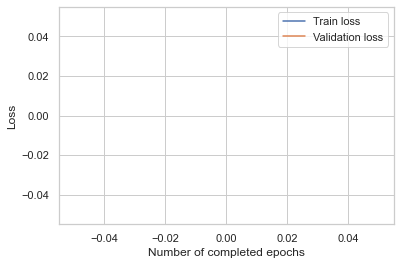

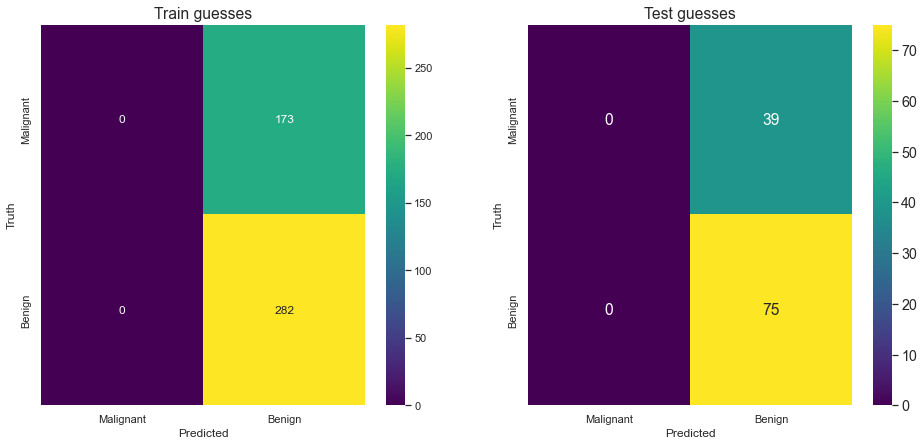

In [63]:
sns.set_theme(style='whitegrid')
#Model parameters
lmb = 100
momentum = 0.9
schedule = 'constant'
lr0 = 10
batch_size=32
n_epochs=1000

logreg = SGD_logreg(lmb = lmb,
                   momentum = momentum,
                   schedule = schedule,
                   lr0=lr0,
                   batch_size=batch_size,
                   n_epochs=n_epochs,
                   val_fraction=0.1)

logreg.fit(X_train,z_train)
logreg.plot_loss()


print("Train accuracy: ",logreg.score(X_train,z_train))
print("Test accuracy: ",logreg.score(X_test,z_test))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z_train,logreg.predict(X_train),ax=ax1,title = 'Train guesses')
ax2 = plot_confusion_matrix(z_test,logreg.predict(X_test),ax=ax2, title = 'Test guesses')

In [64]:
logreg.beta

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [42]:
from sklearn.linear_model import SGDClassifier

#Model parameters
lmb = 10
momentum = 0.9
schedule = 'constant'
lr0 = 10
batch_size=32
n_epochs=100

logreg_sk = SGDClassifier(fit_intercept=False,
                          loss='log',
                          max_iter=100,
                          tol=0,
                          alpha = lmb,
                          learning_rate='constant',
                          eta0=lr0)

logreg_sk.fit(X_train,z_train)
print(logreg_sk.score(X_test,z_test))
logreg_sk.coef_

0.8333333333333334


array([[-1.04143310e-15, -1.04448151e-15, -1.05492901e-15,
        -1.10674388e-15, -1.13527769e-15, -1.24092103e-15,
        -1.51564149e-15, -1.48429177e-15, -2.28157300e-15,
        -8.19697916e-16, -2.10502528e-15, -1.77442642e-15,
        -1.86821730e-15, -1.47908830e-15, -2.41391119e-15,
        -1.51514232e-15, -1.35083196e-15, -1.72241080e-15,
        -1.39712257e-15, -1.92580652e-15, -1.01156604e-15,
        -5.07286878e-16, -9.57564616e-16, -1.05901349e-15,
        -4.72322415e-16, -1.24968975e-16, -8.03533922e-16,
        -3.95628766e-16,  4.20399063e-16, -9.93174085e-16]])